## Serena Williams Win Probability

![Serena Williams](https://espnfivethirtyeight.files.wordpress.com/2015/09/serena0907-1.jpg?quality=100&strip=all&w=360)

Could Serena Williams be a *more* dominant player if she played best-out-of-five-sets instead of best-out-of-three?

[Five-thirty-eight thinks so](http://fivethirtyeight.com/datalab/serena-williams-grand-slam-us-open-best-of-five-sets/)

How can we use dynamic programming to address this question?

- $p$: probability that player A wins a set over player B  
- $q=(1-p)$: probability that player B wins a set

Suppose A and B play a game until one player wins $n$ sets.

Denote $P(i,j)$ as the probability that A wins the game when:
- A needs to win $i$ more sets, and
- B needs to win $j$ more sets
  
**Question**: Using this notation, what's the probability that player A wins a best-out-of-five-sets game?

**Answer**:

Let's solve this problem recursively!

**Question**: What's the probability that A wins the game when B needs 0 more sets to win?

**Question**: What's the probability that A wins the game when A needs 0 more sets to win?

**Question**: What's the probability that A wins the game when both players need to win one more set? 

**Question**: What's the probability that A wins the game when A needs $i$ more sets and B needs $j$ more sets? 



In [6]:
import numpy as np

# compute probability of winning a tennis game
# from single set probability
def tennis_probability(num_sets_to_win, prob_a_wins_set):
    dp_table = np.zeros((num_sets_to_win+1,num_sets_to_win+1))
    dp_table[0,1:] = 1.
    
    for i in xrange(1, num_sets_to_win+1):
        for j in xrange(1, num_sets_to_win+1):
            dp_table[i,j] = prob_a_wins_set * dp_table[i-1,j] + (1-prob_a_wins_set) * dp_table[i,j-1]
    return dp_table[num_sets_to_win, num_sets_to_win]

If player has probability .8 of winning a set, what is the probability that she wins a best-out-of-five game?

In [7]:
tennis_probability(3, .8)

0.94208000000000014

If player has probability .8 of winning a set, what is the probability that she wins a best-out-of-three game?

In [10]:
tennis_probability(2, .8)

0.89600000000000002

Let's make a plot to compare these as a function of probability of winning a set

In [11]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [12]:
set_probabilities = np.linspace(.5, 1, num=50)
best_out_of_five = [tennis_probability(3, p) for p in set_probabilities]
best_out_of_three = [tennis_probability(2, p) for p in set_probabilities]

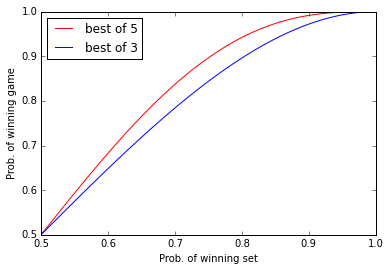

In [17]:
fig, axs = subplots()
axs.plot(set_probabilities, best_out_of_five, 'r', label="best of 5")
axs.plot(set_probabilities, best_out_of_three, 'b', label="best of 3")

axs.set_xlabel("Prob. of winning set")
axs.set_xlim(0.5,1)

axs.set_ylabel("Prob. of winning game")
axs.set_ylim(0.5,1)

axs.legend(loc="best")